# Examining the Distribution of Features and Targets

- learn and understand how the features and targets used are distributed 
- study the distribution of variables, identifying anomalies and examining bivariante relationships

This chapter covers the following topics
- subsetting data
- generating frequencies for categorical features
- generating summary statistics for continuous features
- identifying extreme values and outliers in univariante analysis
- using histograms, boxplots and violin plots to examine the distribution of continuous features

## Subsetting data

Subsetting data is selecting only part of the data for analysis. Usually data with missing values or outliers are removed from analysis.

In [19]:
import numpy as np
import pandas as pd

print("numpy version: {}".format(np.__version__))
print("pandas version: {}".format(pd.__version__))

numpy version: 1.24.2
pandas version: 1.2.4


We will start by loading the NLS data. We also set an index:

In [8]:
# National Longitudinal Survey (NLS) dataset.
nls97 = pd.read_csv("data/nls97.csv")
nls97.set_index("personid", inplace=True)
nls97.shape

(8984, 88)

In [11]:
# Prefer using sample() versus head()
nls97.sample(5).T

personid,355000,387027,264469,871279,668370
gender,Female,Female,Male,Female,Male
birthmonth,8,12,7,3,11
birthyear,1983,1980,1980,1984,1981
highestgradecompleted,12.0,12.0,20.0,12.0,NaN
maritalstatus,Never-married,Never-married,Married,Never-married,NaN
...,...,...,...,...,...
colenroct15,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenrfeb16,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled
colenroct16,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,NaN
colenrfeb17,1. Not enrolled,1. Not enrolled,1. Not enrolled,1. Not enrolled,NaN


In [14]:
nls97.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8984 entries, 100061 to 999963
Data columns (total 88 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 8984 non-null   object 
 1   birthmonth             8984 non-null   int64  
 2   birthyear              8984 non-null   int64  
 3   highestgradecompleted  6663 non-null   float64
 4   maritalstatus          6672 non-null   object 
 5   childathome            4791 non-null   float64
 6   childnotathome         4791 non-null   float64
 7   wageincome             5091 non-null   float64
 8   weeklyhrscomputer      6710 non-null   object 
 9   weeklyhrstv            6711 non-null   object 
 10  nightlyhrssleep        6706 non-null   float64
 11  satverbal              1406 non-null   float64
 12  satmath                1407 non-null   float64
 13  gpaoverall             6004 non-null   float64
 14  gpaenglish             5798 non-null   float64
 1

In [20]:
nls97.describe().T

,count,mean,std,min,25%,50%,75%,max
birthmonth,8984.0,6.555988,3.469429,1.0,3.0,7.0,10.0,12.0
birthyear,8984.0,1982.010352,1.396870,1980.0,1981.0,1982.0,1983.0,1984.0
highestgradecompleted,6663.0,14.059883,4.507592,5.0,12.0,14.0,16.0,95.0
childathome,4791.0,1.859320,1.259053,0.0,1.0,2.0,3.0,9.0
childnotathome,4791.0,0.410144,0.947590,0.0,0.0,0.0,0.0,12.0
wageincome,5091.0,49477.022196,40677.696798,0.0,25000.0,40000.0,62000.0,235884.0
nightlyhrssleep,6706.0,6.637340,1.364404,0.0,6.0,7.0,8.0,20.0
satverbal,1406.0,499.724040,112.166256,14.0,430.0,500.0,570.0,800.0
satmath,1407.0,500.590618,114.953309,7.0,430.0,500.0,580.0,800.0
gpaoverall,6004.0,281.840773,61.635667,10.0,243.0,286.0,326.0,417.0


The following code creates a new DataFrame that contains some demographic and employment data.

In [21]:
# Demographic and employment data columns.
demo_cols = [
    "gender",
    "birthyear",
    "maritalstatus",
    "weeksworked16",
    "wageincome",
    "highestdegree",
]

nls97demo = nls97[demo_cols]
nls97demo.index.name  # New dataframe retains the index of old data frame.

'personid'

In [6]:
# Select row 1000, 1001, 1002, 1003. Row 1004 is not included.
nls97demo[1000:1004].T

personid,195884,195891,195970,195996
gender,Male,Male,Female,Female
birthyear,1981,1980,1982,1980
maritalstatus,NaN,Never-married,Never-married,NaN
weeksworked16,NaN,53.0,53.0,NaN
wageincome,NaN,14000.0,52000.0,NaN
highestdegree,4. Bachelors,2. High School,4. Bachelors,3. Associates


In [7]:
# Every 2 steps instead of 1. So only row 1000, 1002 will be selected.
nls97demo[1000:1004:2].T

personid,195884,195970
gender,Male,Female
birthyear,1981,1982
maritalstatus,NaN,Never-married
weeksworked16,NaN,53.0
wageincome,NaN,52000.0
highestdegree,4. Bachelors,4. Bachelors


In [22]:
## Select first N rows.
# nls97demo[:3]
# nls97demo.head(3)

## Select last N rows.
# nls97demo[-3:]
# nls97demo.tail(3)

## Select by index personid
# nls97demo.loc[[195884, 195891, 195970]]
# nls97demo.loc[[195884:195970]]

## Select by position (similar as array)
nls97demo.iloc[[0, 1, 2]]

,gender,birthyear,maritalstatus,weeksworked16,wageincome,highestdegree
personid,,,,,,
100061,Female,1980,Married,48.0,12500.0,2. High School
100139,Male,1983,Married,53.0,120000.0,2. High School
100284,Male,1984,Never-married,47.0,58000.0,0. None


We want a Boolean Series that is `True` for people who sleep 6 or fewer hours a night (the 33rd percentile) and `False` if `nightlyhrssleep` is greater than 6 or is missing.

In [31]:
nls97["nightlyhrssleep"].head()

personid
100061    6.0
100139    8.0
100284    7.0
100292    NaN
100583    6.0
Name: nightlyhrssleep, dtype: float64

In [25]:
low_sleep_threshold = nls97["nightlyhrssleep"].quantile(0.33)
low_sleep_threshold  # 33% sleep less than 6 hours.

6.0

In [27]:
sleep_check_bool = nls97.nightlyhrssleep <= low_sleep_threshold
sleep_check_bool.head()

personid
100061     True
100139    False
100284    False
100292    False
100583     True
Name: nightlyhrssleep, dtype: bool

In [28]:
# Both should share the same index.
sleep_check_bool.index.equals(nls97.index)

True

In [29]:
# Boolean indexing.
low_sleep = nls97.loc[sleep_check_bool]
low_sleep.shape

(3067, 88)

In [13]:
# We can create it in a single step.
low_sleep = nls97.loc[nls97.nightlyhrssleep <= low_sleep_threshold]
low_sleep.shape

(3067, 88)

In [14]:
# Passing complex condition. The & (AND) indicates both conditions have to be true.
# Using | (OR) means either condition can be true.
low_sleep_3plus_children = nls97.loc[
    (nls97.nightlyhrssleep <= low_sleep_threshold) & (nls97.childathome >= 3)
]
low_sleep_3plus_children.shape

(623, 88)

In [15]:
# Select both rows and columns.
low_sleep_3plus_children = nls97.loc[
    (nls97.nightlyhrssleep <= low_sleep_threshold) & (nls97.childathome >= 3),
    ["nightlyhrssleep", "childathome"],
]
low_sleep_3plus_children.shape

(623, 2)

## Generating frequencies for categorical features

Categorical features
- can be __nominal__ or __ordinal__
- __nominal__ (e.g. gender, country) have a limited number of possible values, can be numeric or string but has no intrinsic numerical meaning
- __ordinal__ also have a limited number of possible values but are different from __nominal__ features in that the order of the values matters (e.g. __Likert scale__ rating, ranging from 1 for very unlikely to 5 for very likely). Arithmetic operations would not make sense for __ordinal__ values.

Create a `one-way frequency distribution` to count all the possible values for the categorical features we may use.

We create a DataFrame that contains just the first 20 columns of the data, and look at the data types. All the `object` type columns in the preceding code are __categorical__.

In [32]:
nls97 = pd.read_csv("./data/nls97.csv")
nls97.set_index("personid", inplace=True)
nls97abb = nls97.iloc[:, :20]
nls97abb.dtypes

gender                    object
birthmonth                 int64
birthyear                  int64
highestgradecompleted    float64
maritalstatus             object
childathome              float64
childnotathome           float64
wageincome               float64
weeklyhrscomputer         object
weeklyhrstv               object
nightlyhrssleep          float64
satverbal                float64
satmath                  float64
gpaoverall               float64
gpaenglish               float64
gpamath                  float64
gpascience               float64
highestdegree             object
govprovidejobs            object
govpricecontrols          object
dtype: object

In [35]:
# By default, NaN are excluded.
# But when analysing data, it is important to show it.
nls97abb.maritalstatus.value_counts(dropna=False)

Married          3066
Never-married    2766
NaN              2312
Divorced          663
Separated         154
Widowed            23
Name: maritalstatus, dtype: int64

We can find the number of missing values by chaining `isnull` and `sum`.

In [37]:
nls97abb.maritalstatus.isnull().sum()

2312

The `maritalstatus` values were sorted by frequency by default. You can sort them alphabetically by values by sorting the index.

The `value_counts` returns a Series with the values as the index.

In [41]:
marital_status_counts = nls97abb.maritalstatus.value_counts(dropna=False)
type(marital_status_counts)  # Series type.

pandas.core.series.Series

In [43]:
marital_status_counts.index  # Values are index.

Index(['Married', 'Never-married', nan, 'Divorced', 'Separated', 'Widowed'], dtype='object')

In [44]:
# Sort alphabetically.
marital_status_counts.sort_index()

Divorced          663
Married          3066
Never-married    2766
Separated         154
Widowed            23
NaN              2312
Name: maritalstatus, dtype: int64

In [47]:
# To display the ratio, set "normalize=True"
nls97abb.maritalstatus.value_counts(dropna=False, normalize=True).sort_index()

Divorced         0.073798
Married          0.341273
Never-married    0.307881
Separated        0.017142
Widowed          0.002560
NaN              0.257346
Name: maritalstatus, dtype: float64

^ We observe that 34% of the responses were `Married`. Note that `dropna=False`, so this includes responses with missing values.

`pandas` has a `category` data type that can store data much more efficiently that the `object` data type when a column has a limited number of values.

Since all `object` columns contains categorical data, we should convert those columns into the `category` data type.

In the following code, we are creating a list that contains the column names for the object columns, `catcols`. Then we loop through those columns and using `astype` to change the data type to `category`:

In [48]:
category_columns = nls97abb.select_dtypes(include=["object"]).columns
category_columns

Index(['gender', 'maritalstatus', 'weeklyhrscomputer', 'weeklyhrstv',
       'highestdegree', 'govprovidejobs', 'govpricecontrols'],
      dtype='object')

In [49]:
for col in category_columns:
    nls97abb[col] = nls97abb[col].astype("category")

In [53]:
nls97abb[category_columns].dtypes

gender               category
maritalstatus        category
weeklyhrscomputer    category
weeklyhrstv          category
highestdegree        category
govprovidejobs       category
govpricecontrols     category
dtype: object

We then check our category features for missing values.

In [54]:
nls97abb[category_columns].isnull().sum()

gender                  0
maritalstatus        2312
weeklyhrscomputer    2274
weeklyhrstv          2273
highestdegree          31
govprovidejobs       7151
govpricecontrols     7125
dtype: int64

^ There are no missing values for `gender`. But the majority of values for `govprovidejobs` and `govpricecontrols` are missing. Those features are not useful for modeling.

In [57]:
nls97abb.filter(like="gov").apply(pd.value_counts, normalize=True)

,govprovidejobs,govpricecontrols
1. Definitely,0.247681,0.541689
2. Probably,0.336607,0.334051
3. Probably not,0.252046,0.086606
4. Definitely not,0.163666,0.037655


In [26]:
# To filter columns by pattern `like`
nls97abb.loc[nls97abb.maritalstatus == "Married"].filter(like="gov").apply(
    pd.value_counts, normalize=True
)

,govprovidejobs,govpricecontrols
1. Definitely,0.173315,0.459864
2. Probably,0.328748,0.380952
3. Probably not,0.314993,0.112925
4. Definitely not,0.182944,0.046259


In [27]:
# Filter the columns directly.
nls97abb.loc[
    nls97abb.maritalstatus == "Married", ["govprovidejobs", "govpricecontrols"]
].apply(pd.value_counts, normalize=True)

,govprovidejobs,govpricecontrols
1. Definitely,0.173315,0.459864
2. Probably,0.328748,0.380952
3. Probably not,0.314993,0.112925
4. Definitely not,0.182944,0.046259


In [28]:
# 95 is used as the missing value, hence we replace it with NaN.
nls97abb.highestgradecompleted.replace(95, np.nan, inplace=True)

In [58]:
# Create a dichotomous feature.
nls97abb["highschoolgrad"] = np.where(
    nls97abb.highestgradecompleted.isnull(),
    np.nan,
    np.where(nls97abb.highestgradecompleted < 12, 0, 1),
)

In [59]:
# The highschoolgrad is pretty imbalanced.
nls97abb.groupby(["highschoolgrad"], dropna=False)["highestgradecompleted"].agg(
    ["min", "max", "size"]
)

,min,max,size
highschoolgrad,,,
0.0,5.0,11.0,1231
1.0,12.0,95.0,5432
NaN,NaN,NaN,2321


We should explore using more groups to represent `highestgradecompleted`. We use pandas `qcut` with `q` set to 6 to create six groups that are as evenly distributed as possible.

In [63]:
nls97abb["highgradegroup"] = pd.qcut(
    nls97abb["highestgradecompleted"], q=6, labels=[1, 2, 3, 4, 5, 6]
)
nls97abb.groupby(["highgradegroup"])["highestgradecompleted"].agg(
    ["min", "max", "size"]
)

,min,max,size
highgradegroup,,,
1,5.0,11.0,1231
2,12.0,12.0,1389
3,13.0,14.0,1288
4,15.0,16.0,1413
5,17.0,17.0,388
6,18.0,95.0,954


In [65]:
nls97abb["highgradegroup"] = nls97abb["highgradegroup"].astype("category")

Generate frequencies for all categorical features.

In [71]:
for col in nls97abb.select_dtypes(include=["category"]):
    print("-------------------------------------")
    print(nls97abb[col].value_counts(dropna=False).sort_index())

-------------------------------------
Female    4385
Male      4599
Name: gender, dtype: int64
-------------------------------------
Divorced          663
Married          3066
Never-married    2766
Separated         154
Widowed            23
NaN              2312
Name: maritalstatus, dtype: int64
-------------------------------------
1 to 3 hours a week         733
10 hours or more a week    3669
4 to 6 hours a week         726
7 to 9 hours a week         368
Less than 1 hour a week     296
None                        918
NaN                        2274
Name: weeklyhrscomputer, dtype: int64
-------------------------------------
11 to 20 hours a week         1145
21 to 30 hours a week          299
3 to 10 hours a week          3625
31 to 40 hours a week          116
Less than 2 hours per week    1350
More than 40 hours a week      176
NaN                           2273
Name: weeklyhrstv, dtype: int64
-------------------------------------
0. None             953
1. GED             1146


### Summary

- generate one-way frequencies for the categorical features in your data
- convert data type from `object` to `category`
- use `values_counts(dropna=False)` to understand the distribution of data

## Generating summary statistics for continuous and discrete features

- continuous feature can take an infinite number of values (e.g. a person's weight)
- discrete features have a finite number of values (e.g. number of birds sighted, or the number of apples purchased)
- discrete feauture is typically something that can be counted, while a continuous feature is usually captured by measurement, weighing and timekeeping

To understand how continuous feature (or discrete feature) is distributed, we examine the following:
- central tendency (mean and median)
- shape (skewness and kurtosis)
- spread (range, interquartile range, variance and standard deviation)

In [108]:
import numpy as np
import pandas as pd
import scipy.stats as scistat

covid_totals = pd.read_csv("./data/covidtotals.csv", parse_dates=["lastdate"])
covid_totals.set_index("iso_code", inplace=True)  # iso_code is unique per row.
covid_totals.shape

(221, 16)

In [109]:
covid_totals.index.unique()

Index(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW',
       ...
       'URY', 'UZB', 'VUT', 'VAT', 'VEN', 'VNM', 'WLF', 'YEM', 'ZMB', 'ZWE'],
      dtype='object', name='iso_code', length=221)

In [82]:
covid_totals.sample(2, random_state=6).T

iso_code,ISL,CZE
lastdate,2021-07-07 00:00:00,2021-07-07 00:00:00
location,Iceland,Czechia
total_cases,6555.0,1668277.0
total_deaths,29.0,30311.0
total_cases_mill,19208.791,155782.968
total_deaths_mill,84.982,2830.428
population,341250.0,10708982.0
population_density,3.404,137.176
median_age,37.3,43.3
gdp_per_capita,46482.958,32605.906


In [89]:
covid_totals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221 entries, AFG to ZWE
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   lastdate             221 non-null    datetime64[ns]
 1   location             221 non-null    object        
 2   total_cases          192 non-null    float64       
 3   total_deaths         185 non-null    float64       
 4   total_cases_mill     192 non-null    float64       
 5   total_deaths_mill    185 non-null    float64       
 6   population           221 non-null    float64       
 7   population_density   206 non-null    float64       
 8   median_age           190 non-null    float64       
 9   gdp_per_capita       193 non-null    float64       
 10  aged_65_older        188 non-null    float64       
 11  total_tests_thous    13 non-null     float64       
 12  life_expectancy      217 non-null    float64       
 13  hospital_beds_thous  170 non-null    f

^ Look at the data types and the number of non-null values for each column. Almost all the columns are continuous or discrete.

In [124]:
# Round and display full values instead of scientific notation.
covid_totals.describe().applymap("{:.0f}".format).T

,count,mean,std,min,25%,50%,75%,max
total_cases,192,963933,3652892,1,13489,110929,437022,33770444
total_deaths,185,21631,72076,1,212,2012,9341,606218
total_cases_mill,192,36649,41404,9,2500,19526,64835,181466
total_deaths_mill,185,683,862,0,44,293,1088,5876
population,221,35134957,139131595,47,628062,6486201,23816775,1439323774
population_density,206,453,2094,0,37,87,214,20547
median_age,190,30,9,15,22,30,39,48
gdp_per_capita,193,19141,20488,661,3823,12237,27216,116936
aged_65_older,188,9,6,1,3,6,14,27
total_tests_thous,13,535,770,67,171,392,471,3005


^ The mean and median (50%) are good indicators of the center of the distribution. There are substancial differences between the mean and median, as an indication of skewness. 

For example, we can see that the mean `total_cases_mill` is almost twice the median (36.6 thousand versus 19.5 thousand). This is a clear indicator of _positive skew_.

The interquartile range is also quite large for cases and deaths with the 75th percentile value being about 25 times larger than the 25th percentile value in both cases.

In [95]:
key_vars = [
    "location",
    "total_cases_mill",
    "total_deaths_mill",
    "aged_65_older",
    "diabetes_prevalence",
]

covid_keys = covid_totals[key_vars]
covid_keys.describe()

,total_cases_mill,total_deaths_mill,aged_65_older,diabetes_prevalence
count,192.000000,185.000000,188.000000,200.000000
mean,36649.371823,683.136995,8.606995,8.442500
std,41403.975473,861.729323,6.122553,4.886392
min,8.521000,0.352000,1.144000,0.990000
25%,2499.746000,43.987000,3.496750,5.340000
50%,19525.726500,293.498000,6.217500,7.200000
75%,64834.619750,1087.893000,13.917500,10.612500
max,181466.382000,5876.013000,27.049000,30.530000


The decile values (0, 10%, 20% ... to 100%) provides a better sense of the distribution.

In [96]:
covid_keys.quantile(np.arange(0.0, 1.1, 0.1))

,total_cases_mill,total_deaths_mill,aged_65_older,diabetes_prevalence
0.0,8.5210,0.3520,1.1440,0.990
0.1,682.1292,10.6834,2.8007,3.298
0.2,1717.3932,30.2154,3.1600,4.788
0.3,3241.8389,66.2710,3.8572,5.741
0.4,9403.5800,145.0608,4.6856,6.698
0.5,19525.7265,293.4980,6.2175,7.200
0.6,33636.4690,556.4328,7.9346,8.318
0.7,55801.3275,949.7140,11.1869,10.080
0.8,74017.8108,1333.7872,14.9168,11.620
0.9,94072.1780,1868.8862,18.8459,13.752


Some machine learning algorithms assume that our features have normal (aka Gaussian) distributions, meaning 
- they are distributed symmetrically (have low skew) and is shaped like a bell
- they have relatively normal tails (neither excessively high nor excessively low kurtosis)

For Gaussian distribution, we expect a value near 0 for skew and 3 for kurtosis.

Definition from other external sources:

- _Skewness_ is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point. [^1]
- _Kurtosis_ is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. [^1]

[^1]: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm#:~:text=Skewness%20is%20a%20measure%20of,relative%20to%20a%20normal%20distribution.

In [98]:
# For Gaussian distribution, we expect a value near 0 for skew.
covid_keys.skew()

total_cases_mill       1.210127
total_deaths_mill      2.004572
aged_65_older          0.839370
diabetes_prevalence    1.524562
dtype: float64

In [99]:
# For Gaussian distribution, we expect a value near 3 for kurtosis.
covid_keys.kurtosis()

total_cases_mill       0.905631
total_deaths_mill      6.580832
aged_65_older         -0.557025
diabetes_prevalence    3.308697
dtype: float64

We can explicitly test each distribution's normality by looping over the features in the `key_vars` list and running a __Shapiro-Wilk__ test on the distribution.

Notice that we need to _drop missing values_ with `dropna` for the test to run.

`p-value` less than 0.05 indicates that we can reject the null hypothesis of normal.

In [107]:
for var in key_vars[1:]:
    stat, p = scistat.shapiro(covid_keys[var].dropna())
    print(f"feature={var}\tp-value={p:.6f}")

feature=total_cases_mill	p-value=0.000000
feature=total_deaths_mill	p-value=0.000000
feature=aged_65_older	p-value=0.000000
feature=diabetes_prevalence	p-value=0.000000


^ All four features have `p-value` less than 0.05, so we reject the null hypothesis of normal. None of the distribution approximates a normal distribution.


### Summary

- understand how continuous and discrete features are distributed, including their central tendency, shape and spread.
- check _skewness_ and _kurtosis_
- use **Shapiro-Wilk** test to test if a distribution is normal

## Identifying extreme values and outliers in univariante analysis

- outliers are unusual observations
- extreme values are not outliers
- extreme values can be identified by looking at its distance from the middle of the distribution (e.g. interquartile range **IQR**, which is the distance between teh first quartile value and the third quartile value)
- values more than 1.5 times the interquartile range above the third quartile or below the first quartile can be flag as extreme

In [111]:
covid_totals = pd.read_csv("./data/covidtotals.csv")
covid_totals.set_index("iso_code", inplace=True)

key_vars = [
    "location",
    "total_cases_mill",
    "total_deaths_mill",
    "aged_65_older",
    "diabetes_prevalence",
    "gdp_per_capita",
]

covid_keys = covid_totals[key_vars]
covid_keys.head()

,location,total_cases_mill,total_deaths_mill,aged_65_older,diabetes_prevalence,gdp_per_capita
iso_code,,,,,,
AFG,Afghanistan,3314.321,139.102,2.581,9.59,1803.987
ALB,Albania,46061.922,853.430,13.188,10.08,11803.431
DZA,Algeria,3261.770,86.338,6.211,6.73,13913.839
AND,Andorra,181466.382,1643.694,NaN,7.97,NaN
AGO,Angola,1201.566,28.144,2.405,3.94,5819.495


We find the IQR for the `total_cases_mill`. We get the first and third quartile values and calculate the interquartile range, `1.5 * (thirdq - firstq)`.

Then we calculate the thresholds to determine the high and low extreme values, which are `interquartilerange + thirdq` and `firstq - interquartilerange` respectively. 

This is the same calculation that is used for the whiskers of a boxplot.

In [113]:
firstq = covid_keys.total_cases_mill.quantile(0.25)
thirdq = covid_keys.total_cases_mill.quantile(0.75)

inter_quantile_range = 1.5 * (thirdq - firstq)

extreme_value_high = inter_quantile_range + thirdq
extreme_value_low = firstq - inter_quantile_range

print(extreme_value_low, extreme_value_high, sep=" <--> ")

-91002.564625 <--> 158336.930375


^ The calculation indicates that any value for `total_cases_mill` that is above 158,337 can be considered extreme. We can ignore extreme values on the low end because they would be negative (`total_cases_mill` must be greater than 0).

In [114]:
# Find the countries that have outliers for `total_cases_mill`.
covid_totals.loc[covid_totals.total_cases_mill > extreme_value_high].T

iso_code,AND,MNE,SYC
lastdate,2021-07-07,2021-07-07,2021-07-07
location,Andorra,Montenegro,Seychelles
total_cases,14021.0,100392.0,16304.0
total_deaths,127.0,1619.0,71.0
total_cases_mill,181466.382,159844.092,165792.15
total_deaths_mill,1643.694,2577.771,721.985
population,77265.0,628062.0,98340.0
population_density,163.755,46.28,208.354
median_age,NaN,39.1,36.2
gdp_per_capita,NaN,16409.288,26382.287


In [133]:
# The three cities above have above threshold total_cases_mill.
covid_totals.mean().apply("{:,.0f}".format)

total_cases               963,933
total_deaths               21,631
total_cases_mill           36,649
total_deaths_mill             683
population             35,134,957
population_density            453
median_age                     30
gdp_per_capita             19,141
aged_65_older                   9
total_tests_thous             535
life_expectancy                73
hospital_beds_thous             3
diabetes_prevalence             8
dtype: object

In [147]:
def get_extreme_values(df_in):
    df_out = pd.DataFrame(columns=df_in.columns, data=None)

    # Skip the first column, which is location.
    for col in df_in.columns[1:]:
        firstq = df_in[col].quantile(0.25)
        thirdq = df_in[col].quantile(0.75)

        interquartile_range = 1.5 * (thirdq - firstq)

        ext_val_low = firstq - interquartile_range
        ext_val_high = interquartile_range + thirdq

        df = df_in.loc[(df_in[col] > ext_val_high) | (df_in[col] < ext_val_low)]
        df = df.assign(varname=col, thresh_low=ext_val_low, thresh_high=ext_val_high)
        df_out = pd.concat([df_out, df])

    return df_out

Find all the extreme values for all columns, except the first one, which is `location` column.

In [148]:
extreme_values = get_extreme_values(covid_keys)
extreme_values

,location,total_cases_mill,total_deaths_mill,aged_65_older,diabetes_prevalence,gdp_per_capita,varname,thresh_low,thresh_high
AND,Andorra,181466.382,1643.694,NaN,7.97,NaN,total_cases_mill,-91002.564625,158336.930375
MNE,Montenegro,159844.092,2577.771,14.762,10.08,16409.288,total_cases_mill,-91002.564625,158336.930375
SYC,Seychelles,165792.150,721.985,8.606,10.55,26382.287,total_cases_mill,-91002.564625,158336.930375
BIH,Bosnia and Herzegovina,62498.800,2946.524,16.569,10.08,11713.895,total_deaths_mill,-1521.872000,2653.752000
CZE,Czechia,155782.968,2830.428,19.027,6.82,32605.906,total_deaths_mill,-1521.872000,2653.752000
HUN,Hungary,83675.850,3105.374,18.577,7.55,26777.561,total_deaths_mill,-1521.872000,2653.752000
PER,Peru,62830.483,5876.013,7.151,5.95,12236.706,total_deaths_mill,-1521.872000,2653.752000
PYF,French Polynesia,NaN,NaN,7.775,22.63,NaN,diabetes_prevalence,-2.568750,18.521250
KIR,Kiribati,16.744,NaN,3.895,22.66,1981.132,diabetes_prevalence,-2.568750,18.521250
MHL,Marshall Islands,67.574,NaN,NaN,30.53,3819.202,diabetes_prevalence,-2.568750,18.521250


In [149]:
extreme_values.varname.value_counts()

gdp_per_capita         9
diabetes_prevalence    8
total_deaths_mill      4
total_cases_mill       3
Name: varname, dtype: int64

We can find the `thresh_high` value for `total_deaths_mill`, which is 2654. Any countries with the total deaths above this is considered an outlier. There are 4 such countries.

In [150]:
extreme_values.loc[extreme_values.varname == "total_deaths_mill", "thresh_high"][0]

2653.752

We list the countries together with the columns we are interested in, sorted in descending value of `total_deaths_mill`.

In [154]:
extreme_values.loc[extreme_values.varname == "total_deaths_mill", key_vars].sort_values(
    ["total_deaths_mill"], ascending=False
)

,location,total_cases_mill,total_deaths_mill,aged_65_older,diabetes_prevalence,gdp_per_capita
PER,Peru,62830.483,5876.013,7.151,5.95,12236.706
HUN,Hungary,83675.850,3105.374,18.577,7.55,26777.561
BIH,Bosnia and Herzegovina,62498.800,2946.524,16.569,10.08,11713.895
CZE,Czechia,155782.968,2830.428,19.027,6.82,32605.906


**Quantile-quantile (Q-Q)** plots can improve our sense of that distribution by allowing us to view it graphically relative to a theoretical distribution: normal, uniform, log or others.

Definition from other sources:

> The quantile-quantile (q-q) plot is a graphical technique for determining if two data sets come from populations with a common distribution.
A q-q plot is a plot of the quantiles of the first data set against the quantiles of the second data set. [^1]

[^1]: https://www.itl.nist.gov/div898/handbook/eda/section3/qqplot.htm#:~:text=The%20quantile%2Dquantile%20(q%2Dq),of%20the%20second%20data%20set.

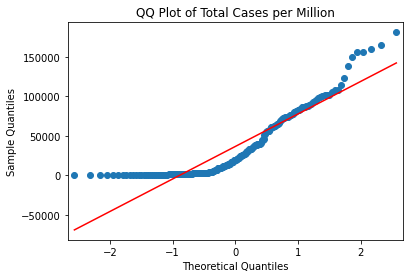

In [166]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

_ = sm.qqplot(
    covid_totals[["total_cases_mill"]].sort_values(["total_cases_mill"]).dropna(),
    line="s",
)
_ = plt.title("QQ Plot of Total Cases per Million")

^ The Q-Q plot makes it clear that the distribution of total cases across countries is not normal. We can see this by how much the data points deviate from the red line. 

It is a Q-Q plot that we would expect from a distribution with some positive skew.

Below we look at a Q-Q plot for a feature with a distribution that is a little closer to normal. The land temperature dataset contains the average temperature readings (in Celsius) in 2019 from 12,000 stations around the world.

In [169]:
land_temps = pd.read_csv("./data/landtemps2019avgs.csv")
land_temps.avgtemp.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

count    12095.000000
mean        11.193542
std          8.563443
min        -60.821000
5%          -0.683167
10%          1.729955
25%          5.417917
50%         10.450000
75%         16.919583
90%         23.070636
95%         27.003583
max         33.930000
Name: avgtemp, dtype: float64

In [172]:
# 14 stations has temperature reading less than -25 degree Celsius.
land_temps.loc[land_temps.avgtemp < -25, "avgtemp"].count()

14

In [68]:
# For Gaussian distribution, we expect a skew close to 0.
land_temps.avgtemp.skew()

-0.26783825834817704

In [174]:
# For Gaussian distribution, we expect a kurtosis close to 3.
land_temps.avgtemp.kurtosis()

2.1698313707061074

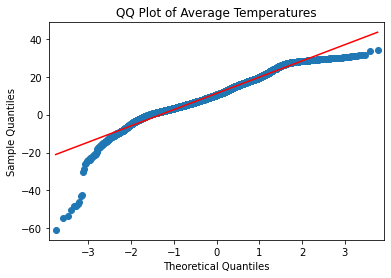

In [176]:
_ = sm.qqplot(land_temps.avgtemp.sort_values().dropna(), line="s")
_ = plt.title("QQ Plot of Average Temperatures")

^ Along most of the range, the distribution of average temperature looks pretty close to normal. The exceptions are the extremely low temperatures, contributing to a small amount of _negative skew_. There is also some deviation at the high end, though this is much less of an issue.


Q-Q plots for features with negative skew has umbrella-like shape, while those with positive skews have more of a bowl-like shape.

### Summary

- find outliers using IQR
- visualize distribution using Q-Q plots

## Using histograms, boxplots, and violin plots to examine the distribution of features

### Using Histogram

Histogram helps us see the spread of a distribution.

In [179]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [186]:
land_temps = pd.read_csv("./data/landtemps2019avgs.csv")
covid_totals = pd.read_csv("./data/covidtotals.csv", parse_dates=["lastdate"])
covid_totals.set_index("iso_code", inplace=True)

print(land_temps.shape)
print(covid_totals.shape)

(12095, 7)
(221, 16)


Create a histogram of total case per million. We also draw lines for the mean and median.

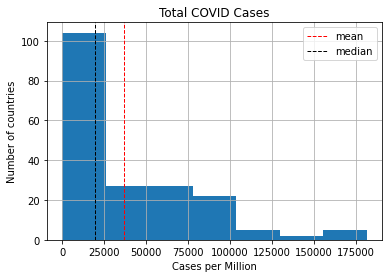

In [190]:
ax = covid_totals["total_cases_mill"].hist(bins=7)
ax.axvline(
    covid_totals["total_cases_mill"].mean(),
    color="red",
    linestyle="dashed",
    linewidth=1,
    label="mean",
)
ax.axvline(
    covid_totals["total_cases_mill"].median(),
    color="black",
    linestyle="dashed",
    linewidth=1,
    label="median",
)
ax.set(
    title="Total COVID Cases", xlabel="Cases per Million", ylabel="Number of countries"
)
_ = ax.legend()

^ Most countries (more than 100 of the 221) are in the very first bin, between 0 cases per million and 25,000 cases per million.

Here, we can see a _positive skew_, with the mean pulled to the right by extreme high values. This is consistent with what we discovered when we used Q-Q plots in the previous section.

Below we create a histogram of average temperatures from the land temperature dataset:

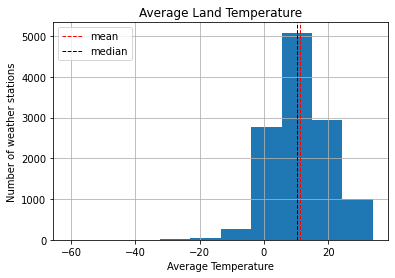

In [191]:
# Plot the histogram.
ax = land_temps["avgtemp"].hist()

# Plot the mean line.
ax.axvline(
    land_temps["avgtemp"].mean(),
    color="red",
    linestyle="dashed",
    linewidth=1,
    label="mean",
)

# Plot the median line.
ax.axvline(
    land_temps["avgtemp"].median(),
    color="black",
    linestyle="dashed",
    linewidth=1,
    label="median",
)

ax.set(
    title="Average Land Temperature",
    xlabel="Average Temperature",
    ylabel="Number of weather stations",
)
_ = ax.legend()

Except for a few highly negative values, this distribution looks closer to normal. The mean and the median are quite close and that the distribution looks fairly symmetrical.

We should take a look a the observatinos at the extreme left of the distribution. They are all in Antartica or the extreme north of Canada.

In [83]:
land_temps.loc[land_temps.avgtemp < -25, ["station", "country", "avgtemp"]].sort_values(
    ["avgtemp"], ascending=True
)

,station,country,avgtemp
827,DOME_PLATEAU_DOME_A,Antarctica,-60.821000
830,VOSTOK,Antarctica,-54.491667
837,DOME_FUJI,Antarctica,-53.375000
844,DOME_C_II,Antarctica,-50.516667
853,AMUNDSEN_SCOTT,Antarctica,-48.408333
842,NICO,Antarctica,-48.406667
804,HENRY,Antarctica,-47.316667
838,RELAY_STAT,Antarctica,-46.091667
828,DOME_PLATEAU_EAGLE,Antarctica,-43.006667
819,KOHNENEP9,Antarctica,-42.407500


### Using Boxplots

An excellent way to visualize central tendency, spread and outliers at the same time is with a **boxplot**.

**Boxplots** shows us the interquartile range, with whiskers representing 1.5 times the interquartile range, and data points beyond that range can be considered extreme values.

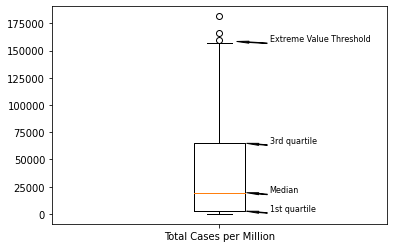

In [222]:
total_cases_mill = covid_totals.total_cases_mill.dropna()
first_quartile = total_cases_mill.quantile(0.25)
third_quartile = total_cases_mill.quantile(0.75)

interquartile_range = 1.5 * (third_quartile - first_quartile)
low_extreme_value = first_quartile - interquartile_range
high_extreme_value = third_quartile + interquartile_range

plt.boxplot(total_cases_mill, labels=["Total Cases per Million"])
arrow_params = dict(
    size=8,
    arrowprops=dict(facecolor="black", headwidth=2, width=0.5, shrink=0.02),
)
plt.annotate(
    "Extreme Value Threshold",
    xy=(1.05, high_extreme_value),
    xytext=(1.15, high_extreme_value),
    **arrow_params,
)
plt.annotate(
    "1st quartile",
    xy=(1.08, first_quartile),
    xytext=(1.15, first_quartile),
    **arrow_params,
)
plt.annotate(
    "3rd quartile",
    xy=(1.08, third_quartile),
    xytext=(1.15, third_quartile),
    **arrow_params,
)
plt.annotate(
    "Median",
    xy=(1.08, total_cases_mill.median()),
    xytext=(1.15, total_cases_mill.median()),
    **arrow_params,
)
pass

^ The median is at the lower end of the range. This is what we see in distributions with positive skews.

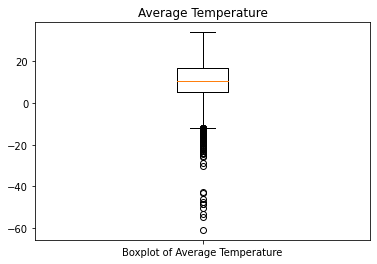

In [219]:
plt.boxplot(land_temps.avgtemp.dropna(), labels=["Boxplot of Average Temperature"])
plt.title("Average Temperature")
pass

^ The median line is closer to the center of the interquartile range.

### Using Violin Plots

Histogram helps us see the spread of a distribution, while boxplots make it easy to identify outliers. We can get a good sense of both the spread of the distribution and the outliers in one graphich with a violin plot.

**Violin plots** combine histograms and boxplots into one plot. They show the IQR, median, and whiskers, as well as the frequency of the observations at all the value ranges.

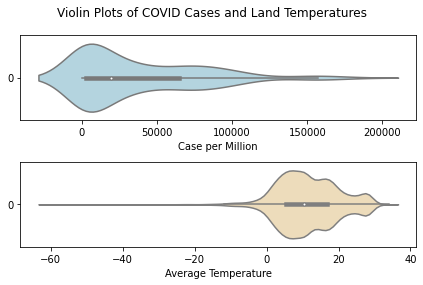

In [238]:
import seaborn as sns

fig = plt.figure()
fig.suptitle("Violin Plots of COVID Cases and Land Temperatures")

fig_rows = 2
fig_cols = 1

ax1 = plt.subplot(fig_rows, fig_cols, 1)
ax1.set(xlabel="Case per Million", yticklabels=[])
sns.violinplot(data=covid_totals.total_cases_mill, color="lightblue", orient="h")

ax2 = plt.subplot(fig_rows, fig_cols, 2)
ax2.set(xlabel="Average Temperature", yticklabels=[])
sns.violinplot(data=land_temps.avgtemp, color="wheat", orient="h")
plt.tight_layout()

^ The black bar with the white dot in the middle is the interquartile range, while the white dot represents the median.

The height of each point (when the violin plot is horizontal) gives us the relative frequency). The thin black lines to the left and right of the interquartile range are the whiskers. 